# CSX46: Class session 2
## *Introduction to the igraph package and the Pathway Commons network in SIF format*

### Objective: load a network of human molecular interactions and create three igraph `Graph` objects from it (one for protein-protein interactions, one for metabolism interactions, and one for directed protein-protein interactions)

OK, we are going to read in the Pathway Commons data in SIF format. Recall that a SIF file is a tab-separated value file. You can find the file as `shared/pathway_commons.sif`. Load it into a data frame `pcdf` using the built-in function `read.table`. Don't forget to specify that the separator is the tab `\t`, and that there is no quoting allowed (`quote=""`). Use the `col.names` argument to name the three columns `species1`, `interaction_type`, and `species2`. Make sure to specify that there is no header and that `stringsAsFactors=FALSE`.

For help on using `read.table`, just type ?read.table

Note: for each row, the `interaction_type` column contains one of 11 different interaction types (identified by a string, like `interacts-with` or `controls-production-of`). 

In [2]:
pcdf <- read.table(FILL IN HERE)


Let's take a peek at `pcdf` using the `head` function:

species1,interaction_type,species2
<chr>,<chr>,<chr>
A1BG,controls-expression-of,A2M
A1BG,interacts-with,ABCC6
A1BG,controls-phosphorylation-of,AKT1
A1BG,controls-state-change-of,AKT1
A1BG,interacts-with,ANXA7
A1BG,interacts-with,CDKN1A


In [4]:
library(igraph)

interaction_types_ppi <- c("interacts-with",
                           FILL IN HERE)

interaction_types_metab <- FILL IN HERE

interaction_types_ppd <- FILL IN HERE


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Subset data frame `pcdf` to obtain only the rows whose interactions are in `interaction_types_ppi`, and select only columns 1 and 3:

In [5]:
pcdf_ppi <- FILL IN HERE

Use the `igraph` function `graph_from_data_farme` to build a network from the edge-list data in `pcdf_ppi`; use `print` to see a summary of the graph:

In [6]:
graph_ppi <- FILL IN HERE
print(FILL IN HERE)

IGRAPH ba9e496 UN-- 17020 523498 -- 
+ attr: name (v/c)
+ edges from ba9e496 (vertex names):
 [1] A1BG--ABCC6   A1BG--ANXA7   A1BG--CDKN1A  A1BG--CRISP3  A1BG--GDPD1  
 [6] A1BG--GRB2    A1BG--GRB7    A1BG--HNF4A   A1BG--ONECUT1 A1BG--PIK3CA 
[11] A1BG--PIK3R1  A1BG--PRDX4   A1BG--PTPN11  A1BG--SETD7   A1BG--SMN1   
[16] A1BG--SMN2    A1BG--SNCA    A1BG--SOS1    A1BG--TK1     A1CF--ACBD3  
[21] A1CF--ACLY    A1CF--APOBEC1 A1CF--APOBEC1 A1CF--ATF2    A1CF--CELF2  
[26] A1CF--CTNNB1  A1CF--E2F1    A1CF--E2F3    A1CF--E2F4    A1CF--FHL3   
[31] A1CF--HNF1A   A1CF--HNF4A   A1CF--JUN     A1CF--KAT5    A1CF--KHSRP  
[36] A1CF--MBD2    A1CF--MBD3    A1CF--NRF1    A1CF--RBL2    A1CF--REL    
+ ... omitted several edges


Do the same for the metabolic network:

In [7]:
FILL IN HERE

IGRAPH 77472bf DN-- 7620 38145 -- 
+ attr: name (v/c)
+ edges from 77472bf (vertex names):
 [1] A4GALT->CHEBI:17659 A4GALT->CHEBI:17950 A4GALT->CHEBI:18307
 [4] A4GALT->CHEBI:18313 A4GALT->CHEBI:58223 A4GALT->CHEBI:67119
 [7] A4GNT ->CHEBI:17659 A4GNT ->CHEBI:58223 AAAS  ->CHEBI:1604 
[10] AAAS  ->CHEBI:2274  AACS  ->CHEBI:13705 AACS  ->CHEBI:15345
[13] AACS  ->CHEBI:17369 AACS  ->CHEBI:18361 AACS  ->CHEBI:29888
[16] AACS  ->CHEBI:57286 AACS  ->CHEBI:57287 AACS  ->CHEBI:57288
[19] AACS  ->CHEBI:57392 AACS  ->CHEBI:58280 AADAC ->CHEBI:17790
[22] AADAC ->CHEBI:40574 AADAC ->CHEBI:4743  AADAC ->CHEBI:85505
+ ... omitted several edges


Do the same for the directed protein-protein interactions:

In [30]:
FILL IN HERE

IGRAPH DN-- 16063 359713 -- 
+ attr: name (v/c), interaction_type (e/c)
IGRAPH DN-- 16063 359713 -- 
+ attr: name (v/c), interaction_type (e/c)
+ edges (vertex names):
 [1] A1BG  ->A2M      A1BG  ->AKT1     A1BG  ->AKT1     A2M   ->APOA1   
 [5] A2M   ->CDC42    A2M   ->RAC1     A2M   ->RAC2     A2M   ->RAC3    
 [9] A2M   ->RHOA     A2M   ->RHOBTB1  A2M   ->RHOBTB2  A2M   ->RHOB    
[13] A2M   ->RHOC     A2M   ->RHOD     A2M   ->RHOF     A2M   ->RHOG    
[17] A2M   ->RHOH     A2M   ->RHOJ     A2M   ->RHOQ     A2M   ->RHOT1   
[21] A2M   ->RHOT2    A2M   ->RHOU     A2M   ->RHOV     A4GALT->ABO     
[25] A4GALT->AK3      A4GALT->B3GALNT1 A4GALT->B3GALT1  A4GALT->B3GALT2 
[29] A4GALT->B3GALT4  A4GALT->B3GALT5  A4GALT->B3GALT6  A4GALT->B3GAT2  
+ ... omitted several edges


Question: of the three networks that you just created, which has the most edges?

Next, we need to create a small graph. Let's make a three-vertex undirected graph from an edge-list. Let's connect all vertices to all other vertices: 1<->2, 2<->3, 3<->1. We'll once again use graph_from_data_farme to do this:

In [11]:
testgraph <- graph_from_data_frame(FILL IN HERE, directed=FALSE)

Now let's plot the small test graph:

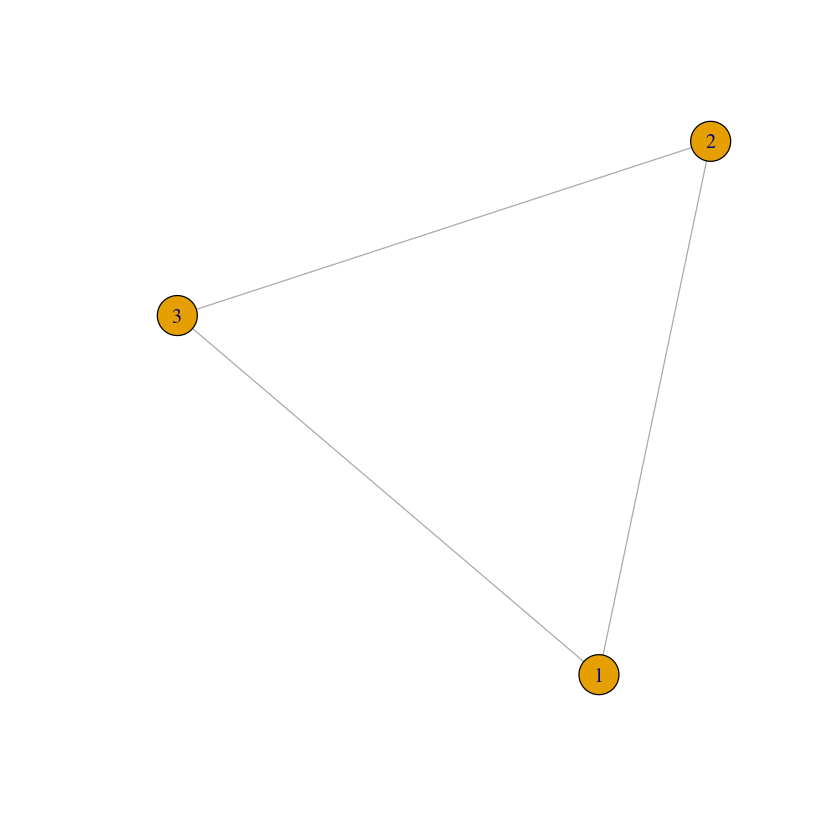

In [12]:
plot(testgraph)